# Regression Tree - Advanced

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder



In [2]:
data_for_model = pickle.load(open("data/abc_abc_regression_modelling.p", "rb"))

In [3]:
data_for_model.drop("customer_id", axis = 1, inplace = True)

In [4]:
# shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [5]:
# deal with missing values
data_for_model.isna().sum()

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [6]:
data_for_model.dropna(how = "any", inplace = True)

In [7]:
# deal with Outliers
# outlier_investigation = data_for_model.describe()
# outlier_investigation

In [8]:
# outlier_columns = ["distance_from_store", "total_sales", "total_items"]

# for column in outlier_columns:
#     lower_quartile = data_for_model[column].quantile(0.25)
#     upper_quartile = data_for_model[column].quantile(0.75)
#     iqr = upper_quartile - lower_quartile
#     iqr_extended = iqr * 2
#     min_border = lower_quartile - iqr_extended
#     max_border = upper_quartile + iqr_extended
    
#     outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
#     print(f"{len(outliers)} outliers detected in column {column}")
    
#     data_for_model.drop(outliers, inplace = True)

In [9]:
# split input variables & output variable
X = data_for_model.drop(["customer_loyalty_score"], axis = 1)
y = data_for_model["customer_loyalty_score"]

In [10]:
# split out training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# deal with categorical variables
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = 'first')

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_encoded.reset_index(drop = True)], axis = 1)
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), X_test_encoded.reset_index(drop = True)], axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)


C:\Users\sophi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X_train

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.04,0.67,1191.53,216,53,5,22.481698,1.0
1,2.04,0.64,1581.41,343,41,4,38.570976,0.0
2,2.24,0.63,1327.51,266,48,4,27.656458,0.0
3,1.72,0.59,2094.10,352,34,3,61.591176,1.0
4,0.24,0.53,1133.45,180,56,5,20.240179,1.0
...,...,...,...,...,...,...,...,...
310,0.37,0.61,1397.66,270,50,4,27.953200,1.0
311,2.94,0.62,2397.63,282,52,5,46.108269,0.0
312,2.31,0.53,1805.39,298,48,5,37.612292,0.0
313,2.80,0.41,1524.01,278,45,3,33.866889,0.0


In [13]:
X_test

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,2.27,0.49,1506.49,281,47,3,32.052979,0.0
1,3.02,0.63,2401.64,278,50,5,48.032800,0.0
2,2.72,0.57,1620.52,246,53,5,30.575849,0.0
3,1.51,0.67,1785.67,331,53,5,33.691887,1.0
4,1.34,0.57,1682.14,364,47,4,35.790213,1.0
...,...,...,...,...,...,...,...,...
74,1.66,0.64,1811.00,344,48,4,37.729167,1.0
75,0.18,0.78,914.98,220,52,4,17.595769,1.0
76,4.02,0.48,322.92,81,13,4,24.840000,0.0
77,0.16,0.56,929.57,225,51,4,18.226863,1.0


In [14]:
# # feature selection
# regressor = LinearRegression()
# feature_selector = RFECV(regressor)
# fit = feature_selector.fit(X_train,y_train)

In [15]:
# optimal_feature_count = feature_selector.n_features_
# print(f"Optimal number of features: {optimal_feature_count}")

In [16]:
# X_train = X_train.loc[:, feature_selector.get_support()]
# X_test = X_test.loc[:, feature_selector.get_support()]

In [17]:
# plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
# plt.ylabel("Model Score")
# plt.xlabel("number of Features")
# plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count}")

In [18]:
# model training
regressor = DecisionTreeRegressor(random_state = 42, max_depth = 4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [19]:
# predict on the test set
y_pred = regressor.predict(X_test)

In [20]:
# calculate r-squared
r_squared = r2_score(y_test, y_pred)
r_squared

0.8666832224200037

In [21]:
# cross validation
cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.8046471635623549

In [22]:
# calculate adjusted r-squared
num_data_point, num_input_vars = X_test.shape
print(num_data_point, num_input_vars)
adjusted_r_squared = 1 -(1-r_squared)*(num_data_point-1)/(num_data_point - num_input_vars -1)
print(adjusted_r_squared)

79 8
0.8514470192680041


In [23]:
# A demonstration of overfitting
y_pred_training = regressor.predict(X_train)
r2_score(y_train, y_pred_training)

0.9059473785182592

In [24]:
# Finding the best max_depth
max_depth_list = list(range(1,9))
accuracy_scores = []

for depth in max_depth_list:
    
    regressor = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]

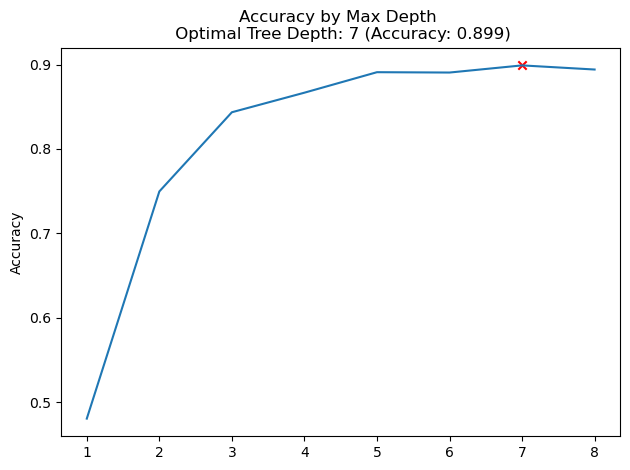

In [26]:
# plot of max depths
plt.plot(max_depth_list, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = "x", color = "red")
plt.title(f"Accuracy by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy: {round(max_accuracy, 4)})")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

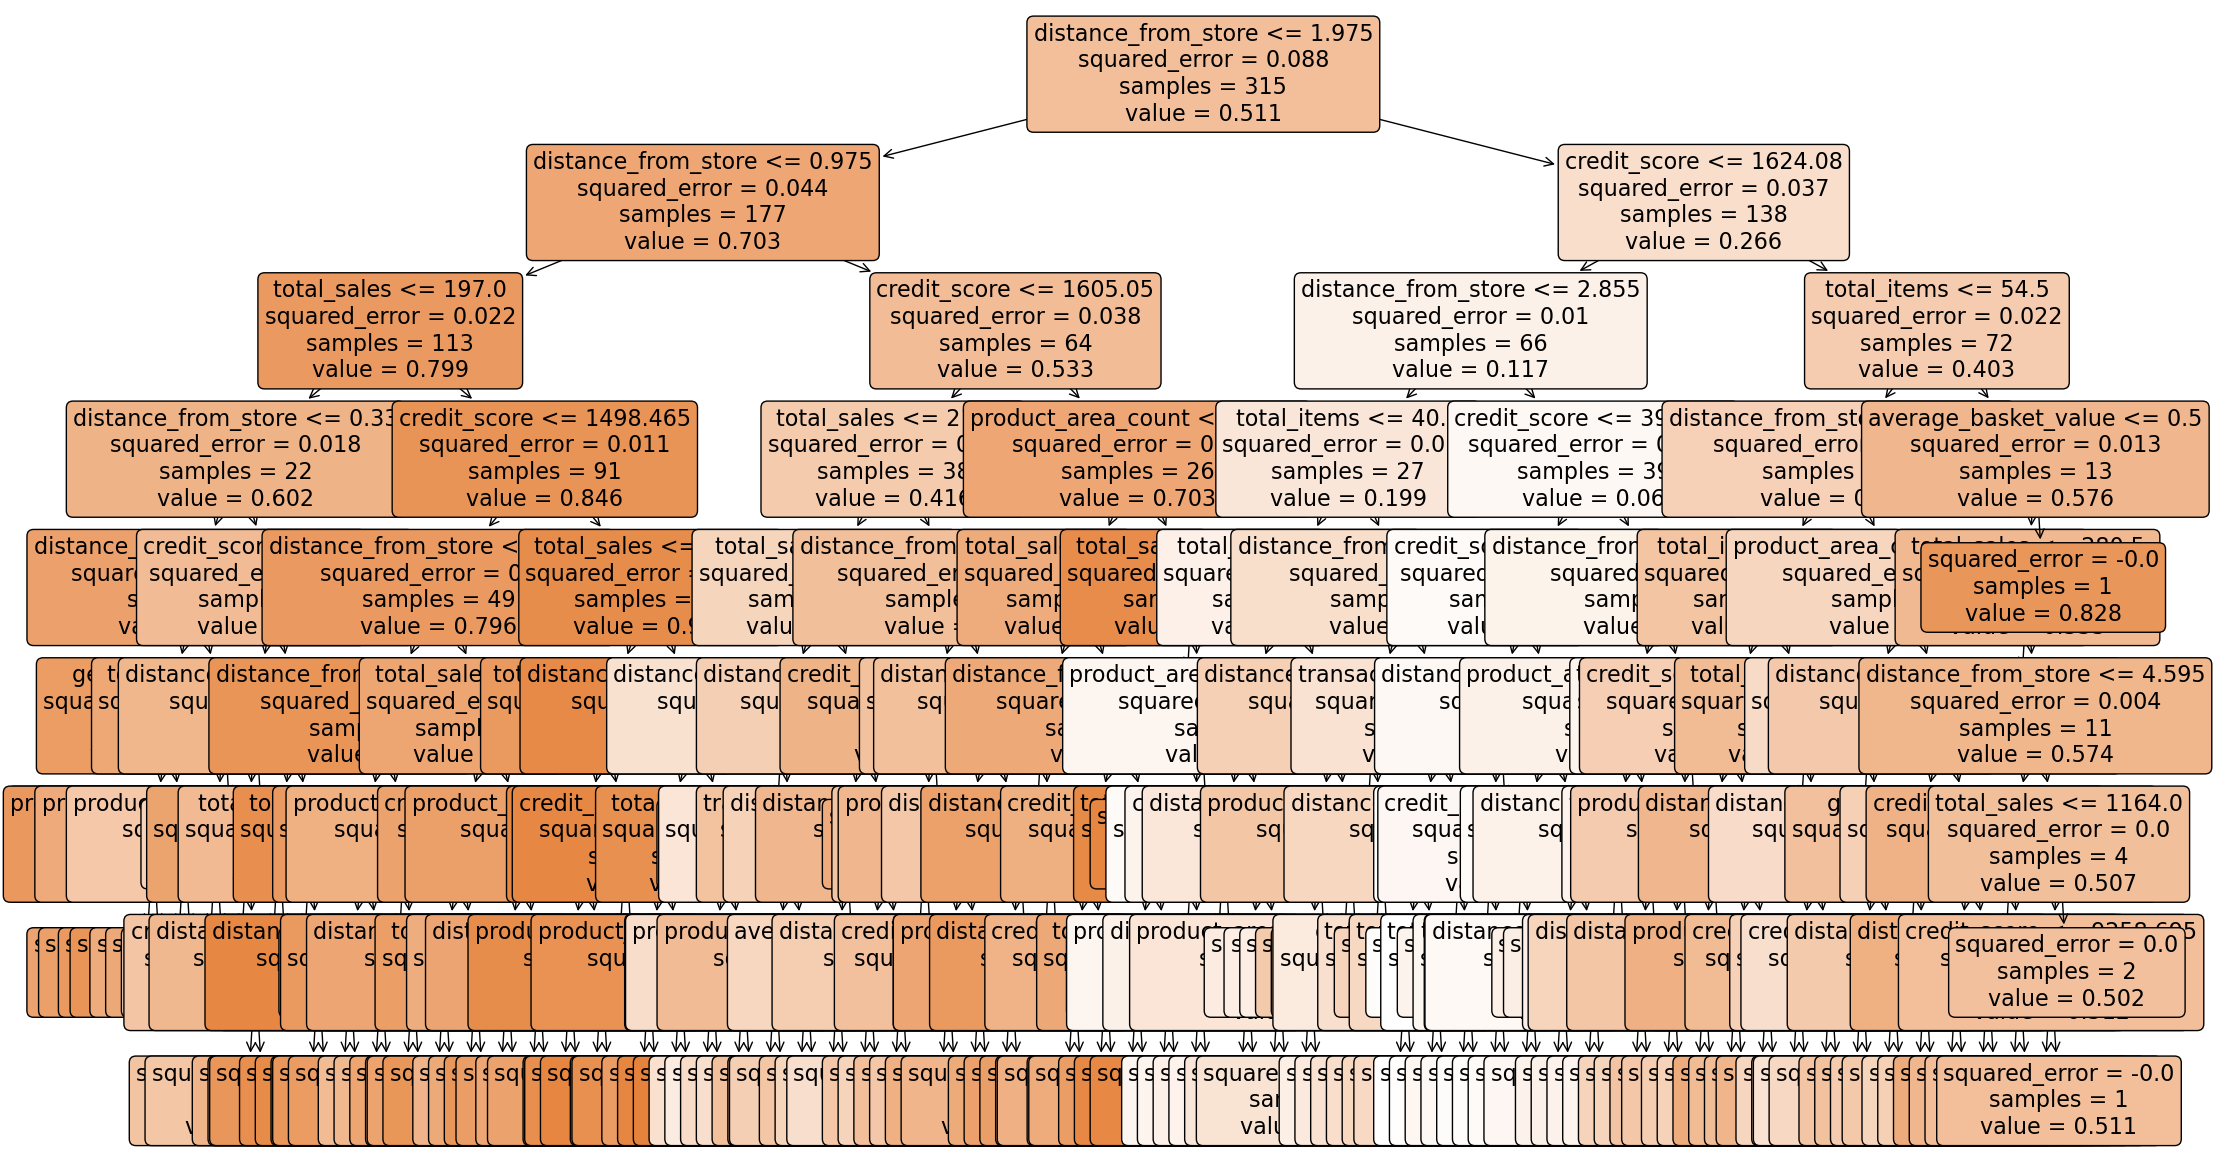

In [28]:
# plot our model
plt.figure(figsize=(25,15))
tree = plot_tree(regressor,
                feature_names = X.columns,
                filled = True,
                rounded = True,
                fontsize = 16)

In [ ]:
# extract model coefficients
coefficients = pd.DataFrame(regressor.coef_)
coefficients

In [ ]:
input_variable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_variable_names,coefficients], axis = 1)
summary_stats.colums = ["input_variable", "coefficient"]
summary_stats

In [ ]:
# extract model intercept
regressor.intercept_